<a href="https://colab.research.google.com/github/nikunjsonule/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset from drive
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/current project/SeoulBikeData.csv', header= 0,
                        encoding= 'unicode_escape')

In [4]:
#importing data and show first 5 rows
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Columns in the datasets
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

First copy the dataset, so our original dataset remains unchanged

# Exploratory Data Analysis

In [6]:
# Using this data frame for all analysis
bike_sharing_data = dataset.copy()

In [7]:
bike_sharing_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Finding  number of null and missing values

In [8]:
#Find out the data type of each column 
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
bike_sharing_data.shape

(8760, 14)

In [10]:
#Detecting missing values
bike_sharing_data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Typically, their are no null and missing values,but it's important to notice and initialized some preprocessing on the feature of dataset if required. 

In [11]:
# data description 
bike_sharing_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
bike_sharing_data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
#converting 'Date' columns to Date format conversion
bike_sharing_data['Date']= pd.to_datetime(bike_sharing_data['Date'])

In [14]:
bike_sharing_data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
# extracting month, day of week and weekdays/weekend from date column

bike_sharing_data['Date'] = pd.to_datetime(bike_sharing_data['Date'])

bike_sharing_data['month'] = bike_sharing_data['Date'].apply(lambda x : x.month)

bike_sharing_data['dayOfWeek'] = bike_sharing_data['Date'].dt.day_name()

bike_sharing_data['weekdays_weekend']=bike_sharing_data['dayOfWeek'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

bike_sharing_data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,dayOfWeek,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


I've three main fetaure now, i.e 'month', 'dayOfWeek', 'weekdays_weekend'

In [16]:
#droping 'Date' and 'dayOfWeek'
bike_sharing_data=bike_sharing_data.drop(columns=['Date','dayOfWeek'],axis=1)

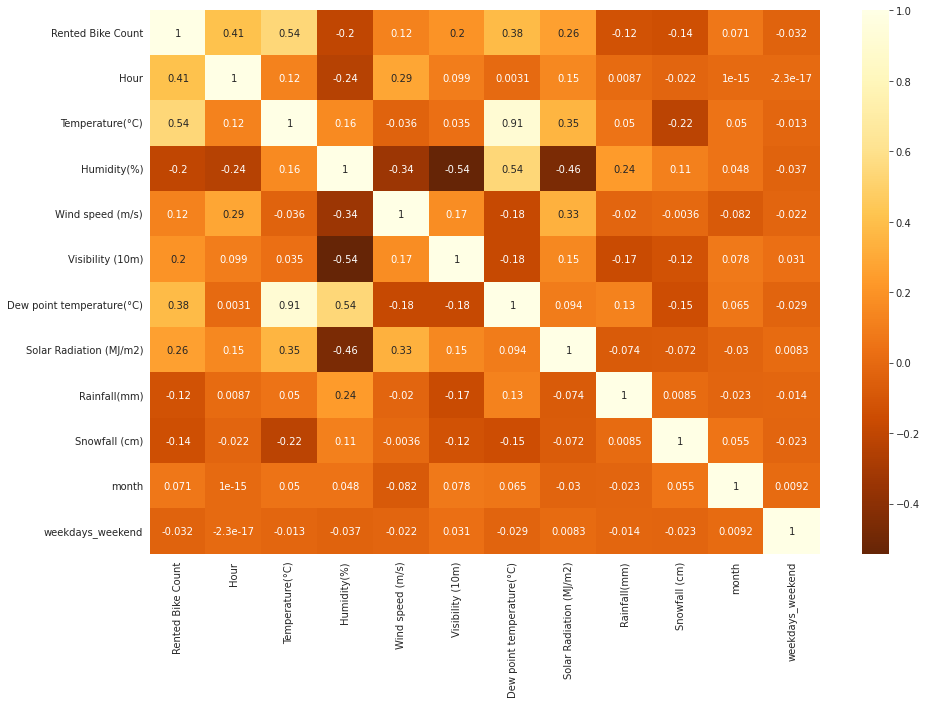

In [17]:
# Doing correlation in variables by using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(bike_sharing_data.corr(),cmap='YlOrBr_r',annot=True)

In [18]:
bike_sharing_data.shape

(8760, 15)

In [19]:
# Multicollinearity and calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [20]:
# VIF of all features except 'Rented Bike Count' and 'Dew point temperature'
cal_vif(bike_sharing_data[[i for i in bike_sharing_data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


From above we can observe that, 'Humidity' and 'Visibility' are having high multicollinearity between this independent variable.

Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

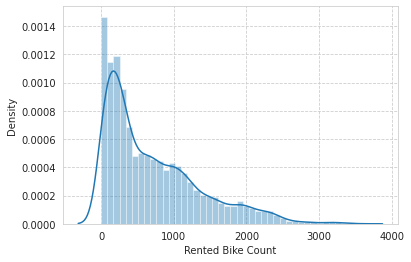

In [21]:
#Distplot visualizing
sns.distplot(bike_sharing_data['Rented Bike Count'])

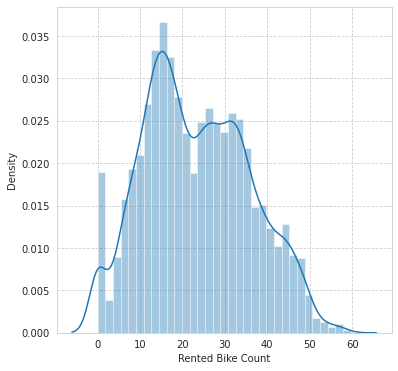

In [87]:
# square root transformation for 'Rented Bike Count'
plt.figure(figsize=(6,6))
sns.distplot(np.sqrt(bike_sharing_data['Rented Bike Count']))

Let's look at some numeric feature

In [23]:
# Numeric Features
numeric_features= bike_sharing_data.select_dtypes(exclude='object')
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [24]:
# describing numeric feature
numeric_features.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


# Univariate Analysis for numeric features

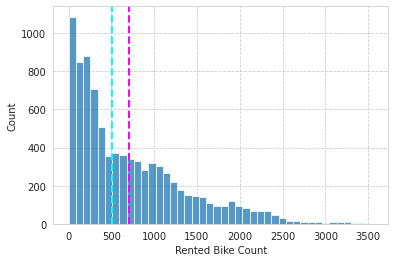

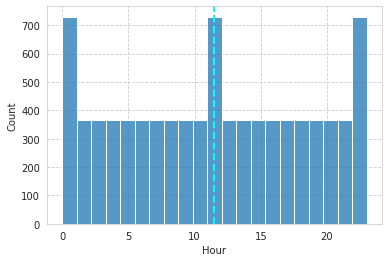

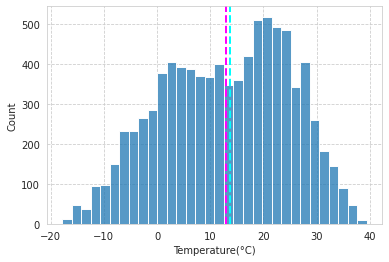

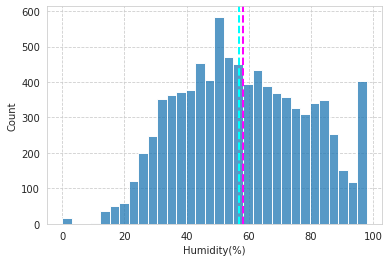

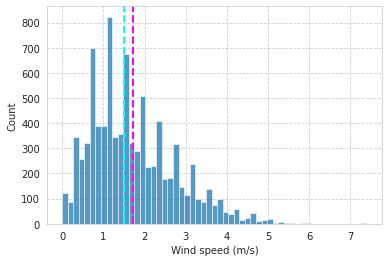

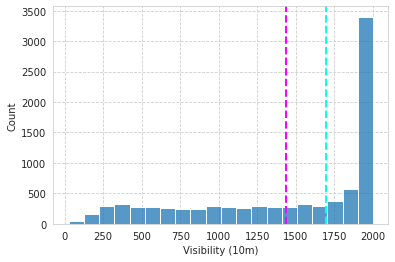

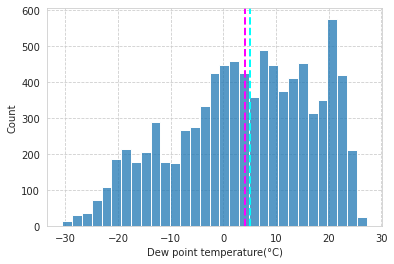

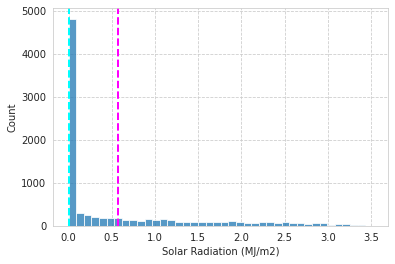

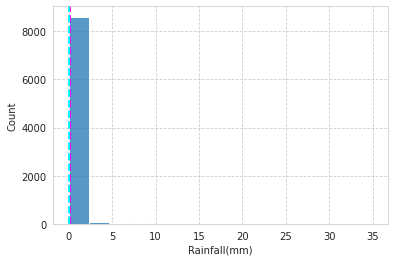

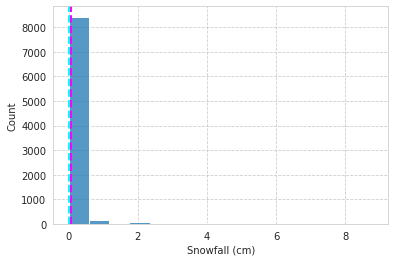

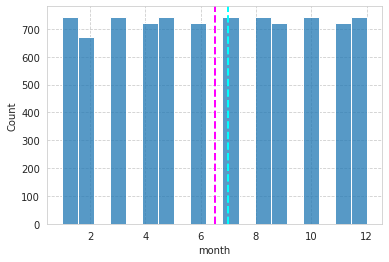

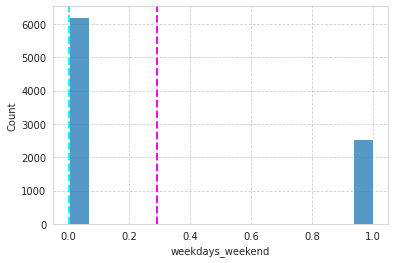

In [25]:
#plotting histogram for numeric feature
for column in numeric_features[:]:
  sns.histplot(bike_sharing_data[column])
  plt.axvline(bike_sharing_data[column].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_sharing_data[column].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

# Bivariate Analysis

## Ploting Regression plot of each columns of dataset v/s rented bike count columns

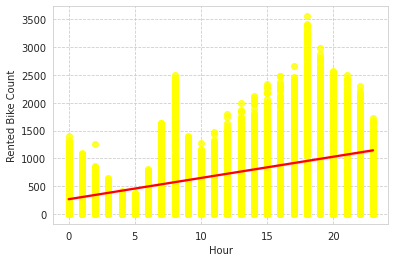

In [26]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns
sns.regplot(data=bike_sharing_data, x='Hour', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

From above regression plots I can't see any pattern. Every time its varying in an hour for rented bike count.

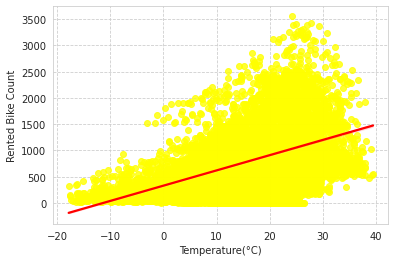

In [27]:
sns.regplot(data=bike_sharing_data, x='Temperature(°C)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

The temperature is really varying from negative to positive till 40 degree celsius. It means that the rented bike is still in demand in every temperature, but most rented bike we can see at nearly 25 degree celsius.

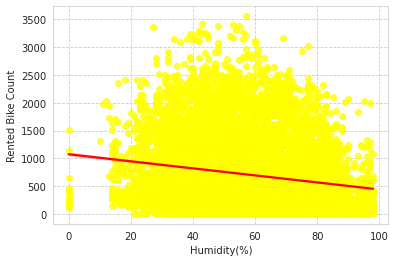

In [28]:
sns.regplot(data=bike_sharing_data, x='Humidity(%)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

From above regression plots we can say that Humidity is not affecting a lot for rented bike. By looking overall Humidity(%) most of them prefer more from 24% Humidity till 58% Humidity. But again its not interfering in rented bike.

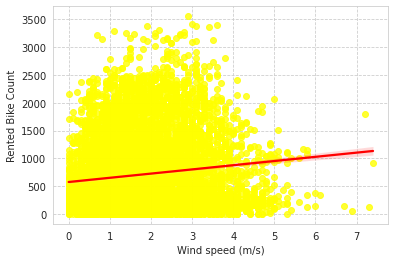

In [29]:
sns.regplot(data=bike_sharing_data, x='Wind speed (m/s)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

The analysis makes sense, as wind speed goes high at Seoul city, people won't prefer rented bike at that particular time. 

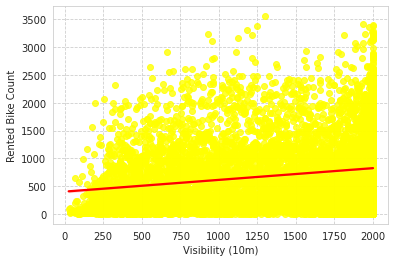

In [30]:
sns.regplot(data=bike_sharing_data, x='Visibility (10m)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

As visibility is clear and high, the rented bikes are more demand.

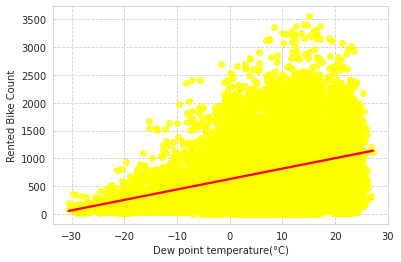

In [31]:
sns.regplot(data=bike_sharing_data, x='Dew point temperature(°C)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

We can observe the data shows precise about people that would prefer normal and suitable temperature for rented bikes.

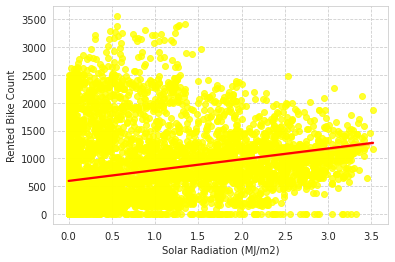

In [32]:
sns.regplot(data=bike_sharing_data, x='Solar Radiation (MJ/m2)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

If the solar radiation is less, then demand for bike sharing is more.  

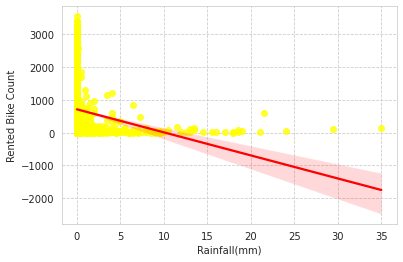

In [33]:
sns.regplot(data=bike_sharing_data, x='Rainfall(mm)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

As rainfall gets increase in rainy season, obviously it's not possible someone to rent a bike. Infact the above regression plot shows negative impact on rented bike. This is very serious issue if the rainfall gets increasing. Besides from this if it's sunny day, their is more chances that people would prefer rented bikes.

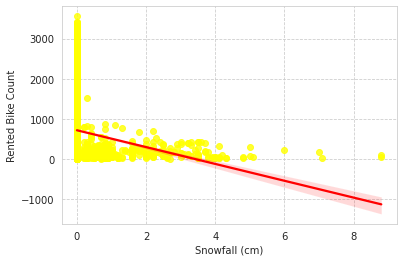

In [34]:
sns.regplot(data=bike_sharing_data, x='Snowfall (cm)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

As from above rainfall analysis what we've seen impact on rented bike, similar is the case for snowfall. If the snowfall is continuous in the Seoul city, rented bike would impact in negative way because of cold whether.

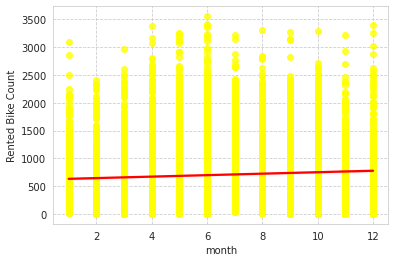

In [35]:
sns.regplot(data=bike_sharing_data, x='month', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

Every month in the city, rented bikes are still prefer.

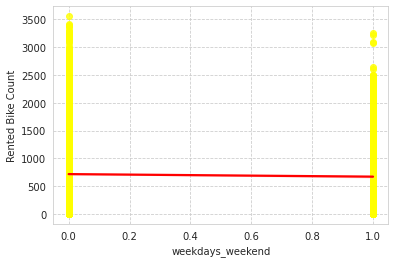

In [36]:
sns.regplot(data=bike_sharing_data, x='weekdays_weekend', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

* It may happen that weekends are off-day from work, people in the Seoul City won't prefer rented bike more in weekends but still we see some observations. 
* Rather than in weekdays, people are busy and working. We see more observations for weekdays as compared to weekends.

In [37]:
bike_sharing_data.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [38]:
#Extracting categorical features from dataset
categorical_features= bike_sharing_data.select_dtypes(include='object')
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


Above are the categorical features of dataset.

Now, let's visualize and get analysis based on categorical features.

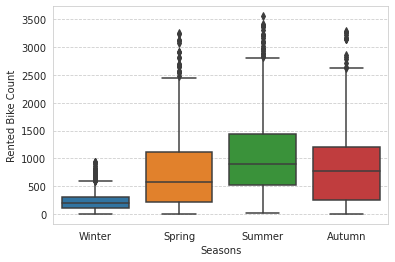

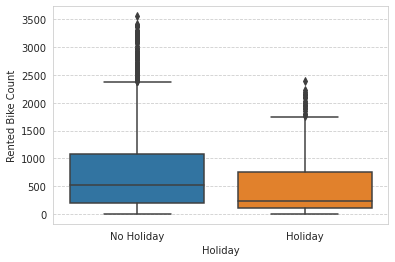

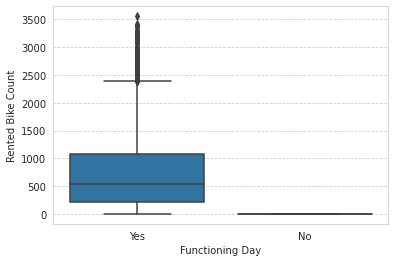

In [39]:
#ploting box plot for categorical features
for col in categorical_features:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=bike_sharing_data[col],y=bike_sharing_data["Rented Bike Count"])
  plt.show()

Insights ▶


* We can oberve that less demand on winter seasons as compared to other seasons
* It is sligthly higher demand during Non holidays than Holidays
* Their is almost no demnad on non functioning day

In [40]:
#counts of functioning day
bike_sharing_data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

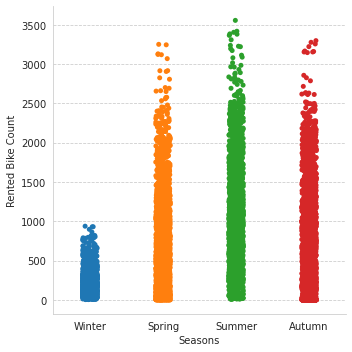

In [41]:
#Insights from cat plot
sns.catplot(x='Seasons',y='Rented Bike Count',data=bike_sharing_data)

We can observe that less demand on winter seasons as compared to other seasons. The Seoul City people prefer more on Summer season. 

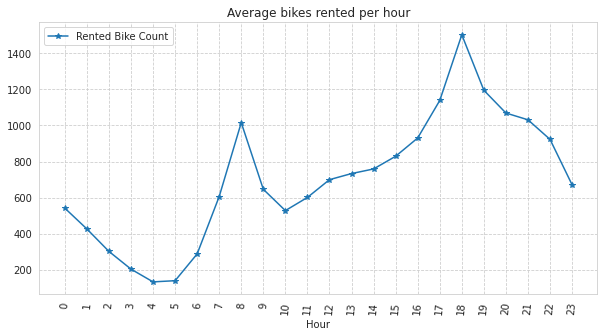

In [42]:
#line graph for average bikes rented per hour
avg_rent_hour = bike_sharing_data.groupby('Hour')['Rented Bike Count'].mean()                          # calculating mean of rented bike Vs hour

# plotting average rent per hour
plt.figure(figsize=(10,5))
avg_plot=avg_rent_hour.plot(legend=True,marker= '*',title="Average bikes rented per hour")
avg_plot.set_xticks(range(len(avg_rent_hour)));
avg_plot.set_xticklabels(avg_rent_hour.index.tolist(), rotation=85);

Insights ▶

* Their is high rise of Rented Bikes from 6:00 a.m to 6:00 p.m
     means people prefer rented bike.
*  We can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

In [43]:
# dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [44]:
#concating numeric & dummy categorical columns 
# creating final dataframe
dataframe_bike_sharing= pd.concat([dummy_categorical_feature,numeric_features],axis=1)
dataframe_bike_sharing.head(2)


,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0


In [45]:
#desribing final dataframe
dataframe_bike_sharing.describe()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.252055,0.252055,0.246575,0.950685,0.966324,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,0.434217,0.434217,0.431042,0.216537,0.180404,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [46]:
dataframe_bike_sharing.shape

(8760, 17)

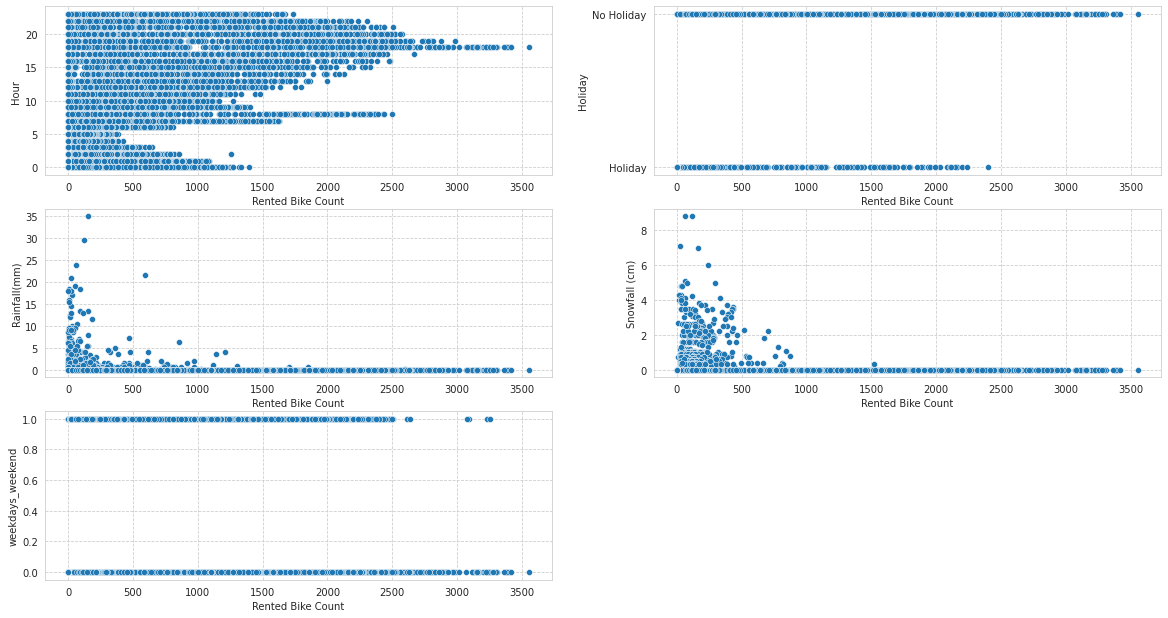

In [47]:
# Scatter plots for some insights from this columns
some_features = ["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
count=1
plt.subplots(figsize=(20, 18))
for some_individual_feature in some_features:
    plt.subplot(5,2,count)
    sns.scatterplot(bike_sharing_data["Rented Bike Count"], bike_sharing_data[some_individual_feature])
    count+=1

plt.show()

Insights from above plot-

* From Hour Vs Rented Bike Count ▶

For more hours the rented bike count gets increased.
we can clearly see there is high demand of Rented bike between the office hours.

* From Holiday Vs Rented Bike Count ▶

We can observe people prefers more on non-holidays as compared to holidays. Working days has comparatively high demand of rented bike as compared to non working day.

* From Rainfall Vs rented Bike Count ▶

We can see that if Rainfall increase demand of Rented Bike decreases.

* From Snowfall Vs rented Bike Count ▶

For snowfall is similar case as we see in rainfall. If snowfall increases demand of Rented Bike decreases


* For weekdays_weekend Vs rented Bike Count ▶

As in earlier step in data preprocessing in our datasets we have 
> 1 - weekends, 0 - weekdays 

We can see it's been more preferable in weekdays which is a working days rather than weekends. But we can see slighlty rented bike counts too in weekends.

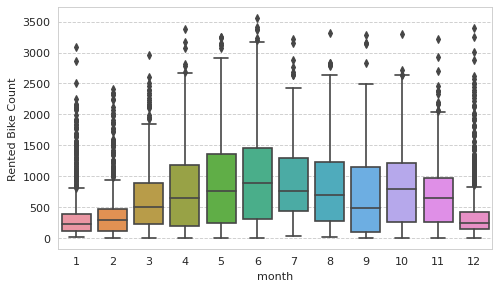

In [48]:
plt.figure(figsize=(7,4),dpi=80)
sns.boxplot(x='month',y='Rented Bike Count',data=bike_sharing_data)
plt.show()

Insights ▶

* From above we can see that their is less demand of Rented bike 
in the month of January, February, and December i.e during winter seasons.

* The demand of bike is maximum during May, June and July (i.e Summer seasons). The whether is normal in this months as compared to other months.

In [49]:
# Final dataset 
pd.set_option('display.max_columns', None)                   # display all columns 
pd.set_option('display.max_rows', None)                         # display all rows 
dataframe_bike_sharing.head(2)

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0


# Function to train linear models and calculate scores

In [50]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [51]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\nEvalution Matrix\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\n Evalution Graph\n')  
  plt.figure(figsize=(12,8))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

#Creating function to run different models

In [52]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\nEvalution Matrix\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

# Evaluation Matrix
    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\nEvalution Graph\n') 
    plt.figure(figsize=(12,8))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 10})
    plt.show()

# Train-Test Split for Linear Regression

In [53]:
# Train spliting  data
X=dataframe_bike_sharing.drop(['Rented Bike Count'],axis=1)

In [54]:
X.shape

(8760, 16)

In [55]:
y=np.sqrt(dataframe_bike_sharing['Rented Bike Count'])

In [56]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [57]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regression Model





In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
#linear regression model
linear_model= LinearRegression()


Evalution Matrix

MSE : 178549.8800121087
RMSE : 422.5516299958015
R2 : 0.567979799391022
Adjusted R2 :  0.5639957514315157

 Evalution Graph



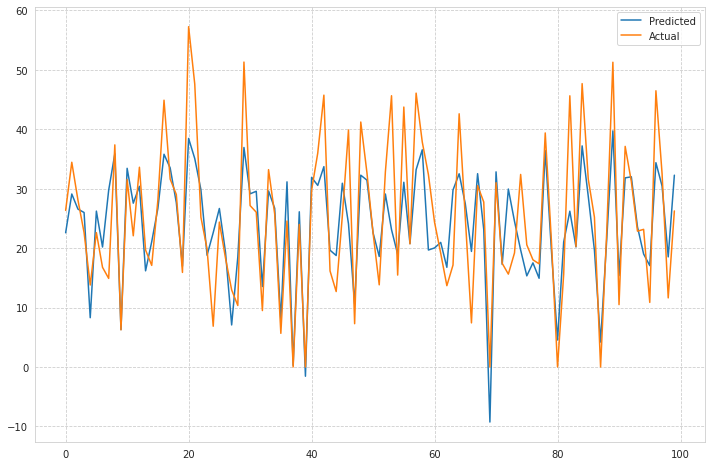

In [60]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

By looking towards R2 and adjusted R2, we can still do regulariztion for better to view score.

#Regularization
## Lasso Regression (L1 Regression)

In [61]:
from sklearn.linear_model import Lasso

In [62]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


Evalution Matrix

MSE : 178395.9320834013
RMSE : 422.369426075564
R2 : 0.5683522925847391
Adjusted R2 :  0.5643716797209672

 Evalution Graph



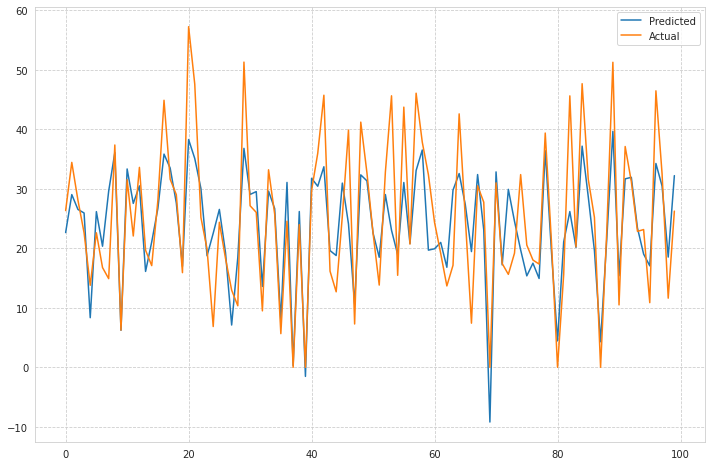

In [63]:
#train linear model to train,fit and evalution for lasso 
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

Still the score is not better. Let's do both Ridege Regression and Elastic Net Regression.

##Ridge Regression (L2 regression)





In [64]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


Evalution Matrix

MSE : 178381.5778392675
RMSE : 422.3524332110181
R2 : 0.5683870241870781
Adjusted R2 :  0.5644067316147399

 Evalution Graph



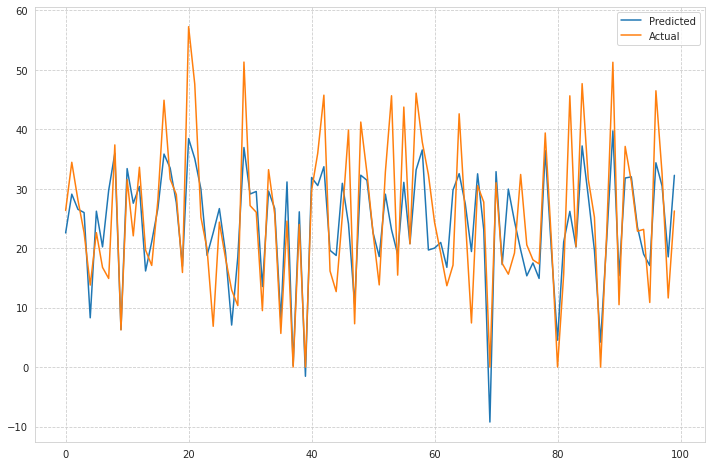

In [65]:
# train linear model to train,fit and evalution of ridge model
train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

##ElasticNet Regression 

In [66]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


Evalution Matrix

MSE : 178255.8184344079
RMSE : 422.2035272642898
R2 : 0.56869131228468
Adjusted R2 :  0.564713825827363

 Evalution Graph



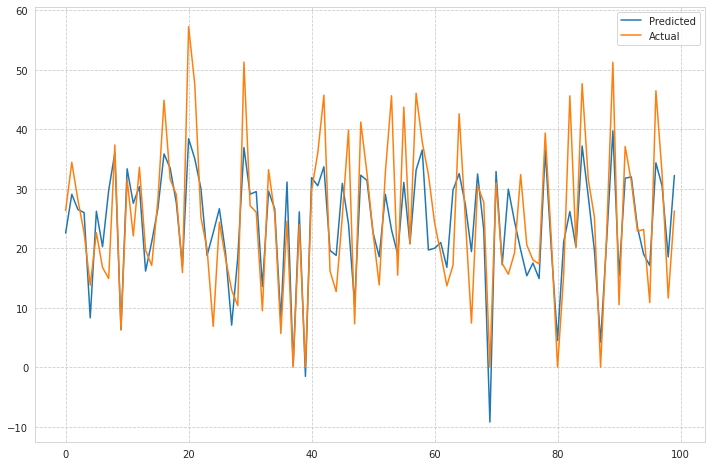

In [67]:
#train linear model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

## Now, let's do Decision Tree and Random Forest

In [68]:
#creating X (i.e independent variable)
X=dataframe_bike_sharing.drop(['Rented Bike Count'],axis=1)

In [69]:
#creating y for dependent variable
y=dataframe_bike_sharing['Rented Bike Count']

In [70]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Fixing random state at some value, otherwise it will change whenever I will run the model, we get slighlty different accuracy which is not good.

#Decision Trees

In [71]:
from sklearn.tree import DecisionTreeRegressor


Evalution Matrix

MSE : 89608.61095890412
RMSE : 299.3469741936673
R2 : 0.7810156508923756
Adjusted R2 :  0.7794032488740958

Evalution Graph



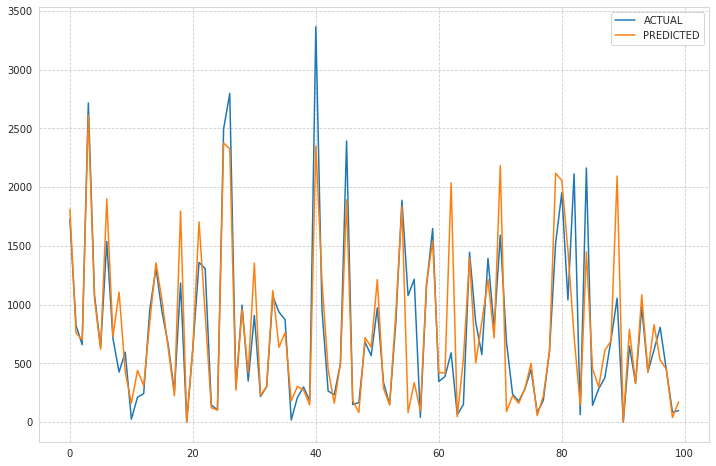

In [72]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#model will run for train, fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

Now, let's looking towards Feature Importance

In [73]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(12,9))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

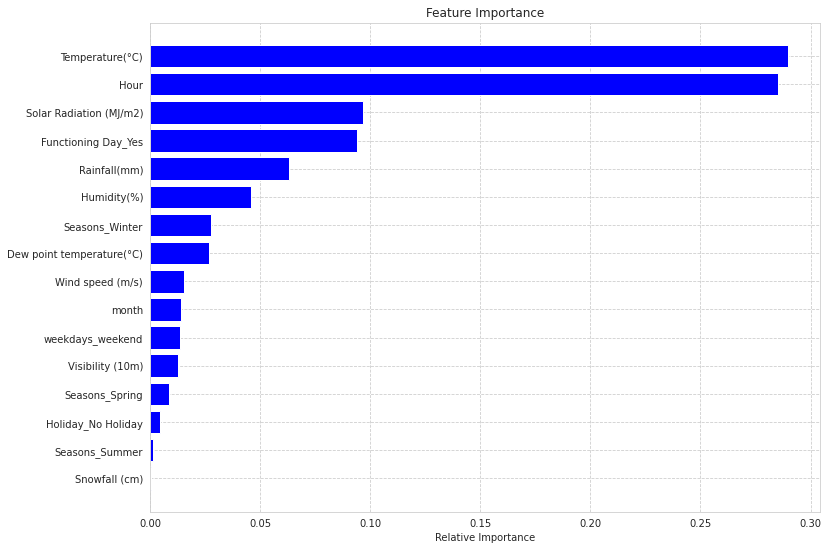

In [74]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

#Random Forest






In [75]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [76]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [77]:
#creating parameter dict to check random forest with different value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [78]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


Evalution Matrix

MSE : 63049.81390627255
RMSE : 251.0972200289612
R2 : 0.8459196910668104
Adjusted R2 :  0.8447851834998841

Evalution Graph



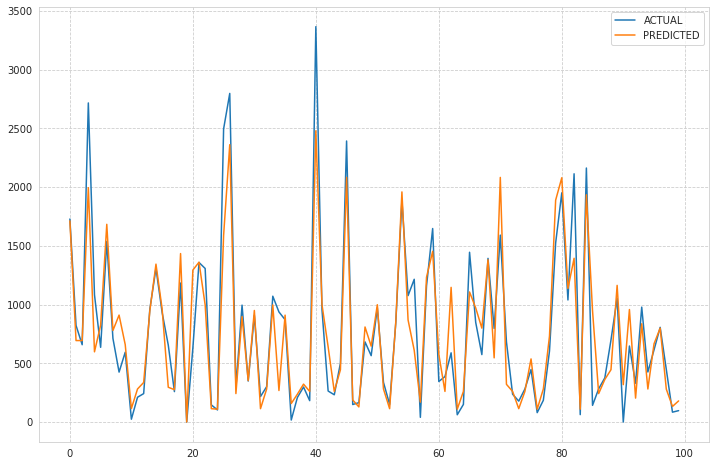

In [79]:
#model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [80]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

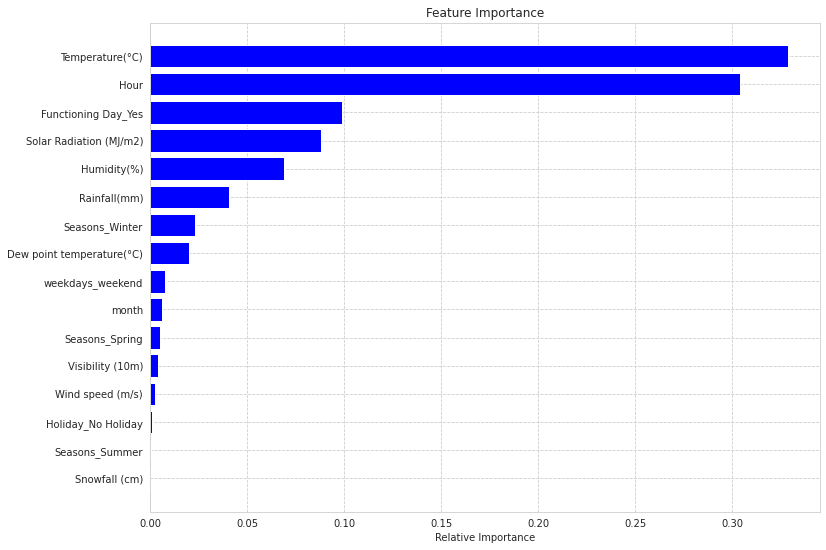

In [81]:
#visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

#Model Evaluation Matrix of Linear Regression, Decision Tree and Random Forest

In [82]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [83]:
#list of all model
model_name=['Linear','Lasso','Ridge','Elasticnet','Decision_Tree','Random_Forest']

In [84]:
#converting dictionary to dataframe
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Decision_Tree,Random_Forest
Mean_square_error,178549.880012,178395.932083,178381.577839,178255.818434,89608.610959,63049.813906
Root_Mean_square_error,422.551630,422.369426,422.352433,422.203527,299.346974,251.097220
R2,0.567980,0.568352,0.568387,0.568691,0.781016,0.845920
Adjusted_R2,0.563996,0.564372,0.564407,0.564714,0.779403,0.844785


In [85]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,178549.880012,422.551630,0.567980,0.563996
1,Lasso,178395.932083,422.369426,0.568352,0.564372
2,Ridge,178381.577839,422.352433,0.568387,0.564407
3,Elasticnet,178255.818434,422.203527,0.568691,0.564714
4,Decision_Tree,89608.610959,299.346974,0.781016,0.779403
5,Random_Forest,63049.813906,251.097220,0.845920,0.844785


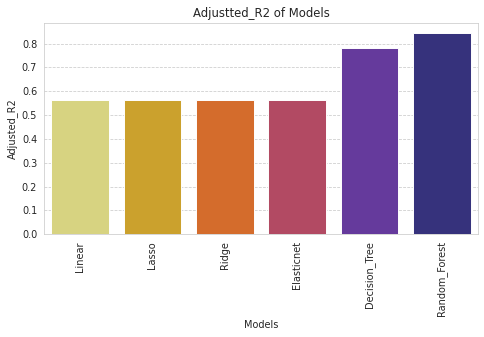

In [86]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(8,4),dpi=70)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="CMRmap_r").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

Insights from above bar plots ▶

*  I've calculated MSE, RMSE, R2 and adjusted R2 - which tells us wide range different among all models we've performed.
* Among all, the better we can observe is in Random Forest model which gives us 84% higher accuracy.
* Slighlty down we can observe for Decision Tree model with 77% accuracy of R2 and adjusted R2.
* The less accuracy of R2 and adjusted R2 is with Linear Regression, L1 & L2 and ElasticNet too.
* So, comparatively Random Forest is doing good with our predictions model. 

# Conclusions

* The holiday or non-working days their is demand in rented bikes.

* In the Seoul City people prefer more rented bikes in the morning at 8 AM and  evening at 6 PM. As people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

* Performing the various models the Random Forest is the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the Random Forest model.

* People won't prefer to go in rainfall. Similarly, in snowfall winter season the snowfall is continuous in the Seoul city, rented bike would impact in negative way because of cold whether.

* The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

* To do more predictions we can use Random Forest model among all other model.